# Линейная регрессия

In [1]:
from sklearn.datasets import make_blobs, make_moons
from sklearn.model_selection import train_test_split
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib
import copy

In [2]:
def read_data(path="boston.csv"):
    dataframe = np.genfromtxt(path, delimiter=",", skip_header=15)
    np.random.seed(42)
    np.random.shuffle(dataframe)
    X = dataframe[:, :-1]
    y = dataframe[:, -1]
    return X, y

In [3]:
def generate_synthetic(size:int, dim=6, noise=0.1):
    X = np.random.randn(size, dim)
    w = np.random.randn(dim + 1)
    noise = noise * np.random.randn(size)
    y = X.dot(w[1:]) + w[0] + noise
    return X, y

Для начала нужно понять, какую метрику для ошибки будем использовать. В нашем случае нам подойдет стандартная метрика MSE. Также чтобы оценить качество модели нам понадобится метрика $R^2$. Реализуем обе эти метрики.

In [4]:
from task import mse, r2

Теперь реализуем линейную регрессию при помощи явного решения задачи минимизации. 

#### Методы
`fit(X, y)` - решает задачу минимизации $\arg\min_{w, b}\sum ((w\cdot x + b) - y)^2$. 

`predict(X)` - строит предсказание `y` для объектов из `X`.

In [5]:
from task import NormalLR

In [6]:
X, y = generate_synthetic(1024)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [7]:
regr = NormalLR()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
print(f"MSE: {mse(y_test, y_pred)}, R2: {r2(y_test, y_pred)}")

MSE: 0.008857139041354108, R2: 0.9928371410288919


Теперь реализуем линейную регрессию с использованием градиентного спуска с larning rate `alpha` в течении `iterations` итераций. Используем регуляризацию Лассо с коэффициентом `l`.

#### Методы
`fit(X, y)` - приближает решение задачи минимизации $\arg\min_{w, b}\sum ((w\cdot x + b) - y)^2$ при помощи градиентного спуска. 


`predict(X)` - строит предсказание `y` для объектов из `X`.

In [10]:
from task import GradientLR

In [11]:
def build_plot(X_train, y_train, X_test, y_test):
    xs = np.arange(0.0, 0.02, 0.0002)
    errors = []
    for x in xs:
        regr = GradientLR(0.1, iterations=10000, l=x)
        regr.fit(X_train, y_train)
        errors.append(mse(y_test, regr.predict(X_test)))
    plt.figure(figsize=(9, 4))
    plt.xlim(xs[0], xs[-1])
    plt.grid()
    plt.plot(xs, errors)
    plt.show()

In [12]:
X, y = generate_synthetic(1024)
X, X_val, y, y_val = train_test_split(X, y, train_size=0.9, shuffle=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True)

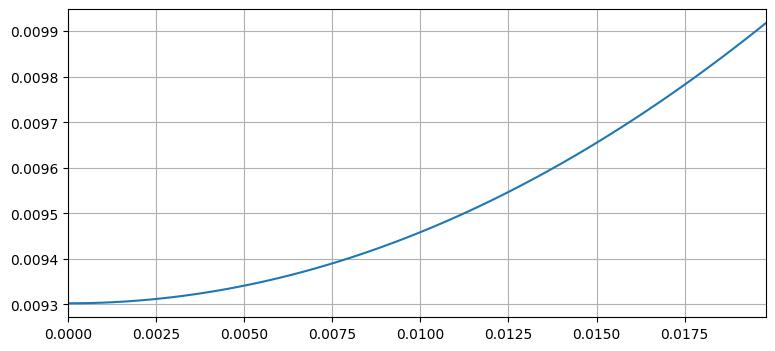

In [13]:
build_plot(X_train, y_train, X_val, y_val)

In [14]:
regr = GradientLR(0.1, iterations=10000)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
print(f"MSE: {mse(y_test, y_pred)}, R2: {r2(y_test, y_pred)}")

MSE: 0.009975435723732383, R2: 0.9977841733960051


Линейная регрессия является методом, который можно интерпретировать основываясь на значениях весов модели. Реализуем метод, который будет упорядочивать признаки по их важности от наибольшей важности к наименьшей.

Обратим внимание, что такая интерпретация имеет смысл только если данные предварительно нормализованы, а также в признаках нет мультиколлинеарности (если используем обычную линейную регрессию).

#### Методы
`get_feature_importance` - метод, который вычисляет важность для каждого признака. Принимает на вход обученную линейную регрессию, возвращает список значений метрики важности признаков.

`get_most_important_features`- метод, который упорядочевает признаки по их важности в порядке убывания. Принимает на вход обученную линейную регрессию, возвращает упорядоченный список, состоящий из индексов признаков.

In [15]:
from task import get_feature_importance, get_most_important_features

In [16]:
regr = NormalLR()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

print(get_feature_importance(regr))
print(get_most_important_features(regr))

[0.9206187830043486, 0.15025833872921945, 0.5962428700366051, 0.10430574858177433, 1.5463736203507343, 0.9570281055422479]
[4, 5, 0, 2, 1, 3]


In [17]:
regr = GradientLR(0.1, iterations=10000)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

print(get_feature_importance(regr))
print(get_most_important_features(regr))

[0.9206187830043486, 0.15025833872921937, 0.5962428700366051, 0.10430574858177438, 1.546373620350734, 0.9570281055422479]
[4, 5, 0, 2, 1, 3]
